# Unidad 1: Caso práctico

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


Volver a clasificar el largo y ancho de los sépalos utilizando RadiusNeighborsClassifier para radios de 0,3, 0,5, 0,7, 0,9 y 1,1. Hay que tener en cuenta que es necesario dar un asignar un valor para los puntos en los que no existe un dato en el radio indicado, para su represetnación se ha de añadir un nuevo color a `cmap_light` que puede ser un gris como `'#AAAAAA'`.

Para llevar a cabo esto se ha de repetir la carga de datos:

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

# Se utilizan la primera y segunda columna con el largo y ancho de los sépalos  
X = iris.data[:, 0:2]
y = iris.target

Se importa el clasificador y se ajusta con el primer radio, a los `outliers` se le asigna el cuarto color mediante la opción `outlier_label`.

In [3]:
from sklearn.neighbors import RadiusNeighborsClassifier

knn = RadiusNeighborsClassifier(0.3, outlier_label = 3)
knn.fit(X, y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, outlier_label=3, p=2, radius=0.3,
             weights='uniform')

La representación es idéntica al ejercicio, simplemente se ha de añadir el nuevo color.

(1.0, 5.3500000000000041)

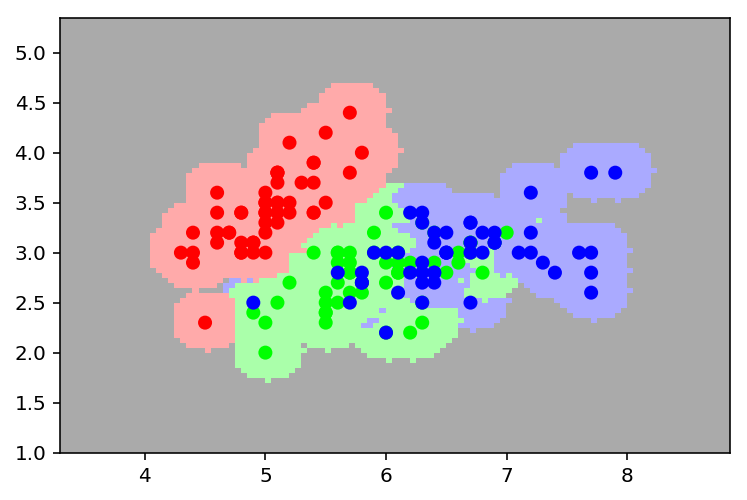

In [4]:
from matplotlib.colors import ListedColormap

# Version clara y oscura de los coloes
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Creación de un conjunto de datos para 
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

pcolormesh(xx, yy, Z, cmap = cmap_light)
scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

Como se han solicitado varias repeticiones de la misma ejecución con diferentes conjuntos de datos esto se puede factorizar en una función.


In [5]:
def modelRadius(X, y, r):
    # Creación del modelo
    knn = RadiusNeighborsClassifier(r, outlier_label = 3)
    knn.fit(X, y)

    # Version clara y oscura de los coloes
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Creación de un conjunto de datos para 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    pcolormesh(xx, yy, Z, cmap = cmap_light)
    scatter(X[:, 0], X[:, 1], c=y, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())

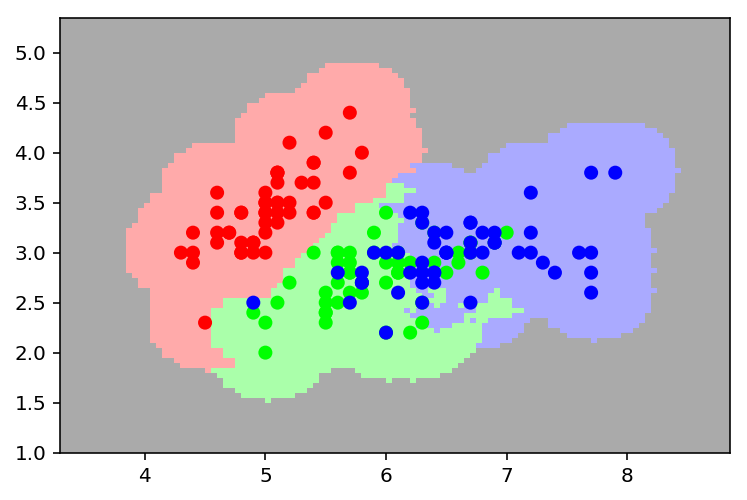

In [6]:
modelRadius(X, y, 0.5)

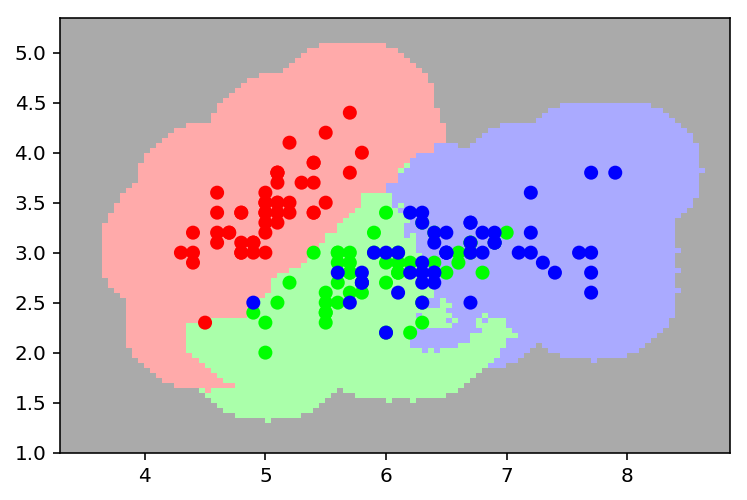

In [7]:
modelRadius(X, y, 0.7)

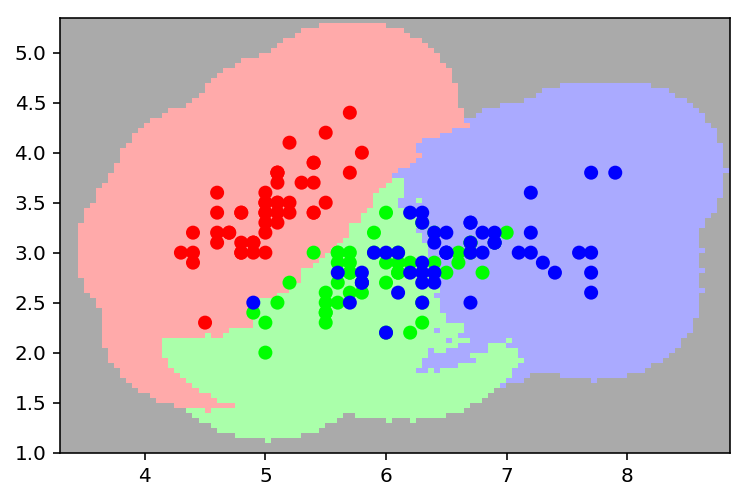

In [8]:
modelRadius(X, y, 0.9)

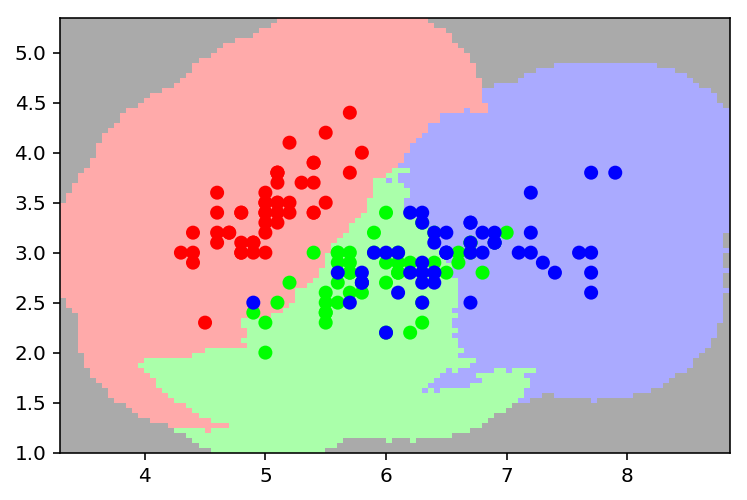

In [9]:
modelRadius(X, y, 1.1)